In [42]:
##import neccessary for the projects
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from networkx.algorithms import community
% matplotlib inline
##Make the plot a bit bigger
plt.rcParams['figure.figsize'] = [10, 5]

In [2]:
# Read the file downloaded into a dataframe
data=pd.read_csv('CE-LC.txt', sep='\t', header=None, names = ['protein-1', 'protein-2','weight'])
data.head()

,protein-1,protein-2,weight
0,AC3.3,AC3.4,2.945855
1,AC3.3,C03A7.14,2.895269
2,AC3.3,C05D2.1,2.390948
3,AC3.3,C37C3.6,2.945855
4,AC3.3,Y39B6A.1,2.852143


In [9]:
len(data)

1648

**1. Build the corresponding network (G) with Networkx**

In [3]:
##Create an undirected graph and add edge from the dataframe
G=nx.Graph()
for i in range(len(data)):
    G.add_edge(data['protein-1'][i], data['protein-2'][i], weight=data['weight'][i])

**2. What are number of nodes, number of edges and the average degree of the network?**

In [4]:
print(nx.info(G))

Name: 
Type: Graph
Number of nodes: 1387
Number of edges: 1648
Average degree:   2.3764


**3. What is the density of the network?** 
<br>
<br>
*Network density*: the portion of the potential connections in a network that are actual connections.

In [16]:
nx.density(G)

0.001714539566017576

**4. Find the minimum spanning tree in G and draw it.**
<br>
<br>
A *spanning tree* T of an undirected graph G is a subgraph that is a tree which includes all of the vertices of G. If a graph is not connected, it has spanning forests, but no spanning tree.
A *minimum spanning tree* (MST) is a spanning tree whose sum of edge weights is minimum.

In [8]:
T=nx.minimum_spanning_tree(G, weight='weight')

In [11]:
print(nx.info(T))

Name: 
Type: Graph
Number of nodes: 1387
Number of edges: 1298
Average degree:   1.8717


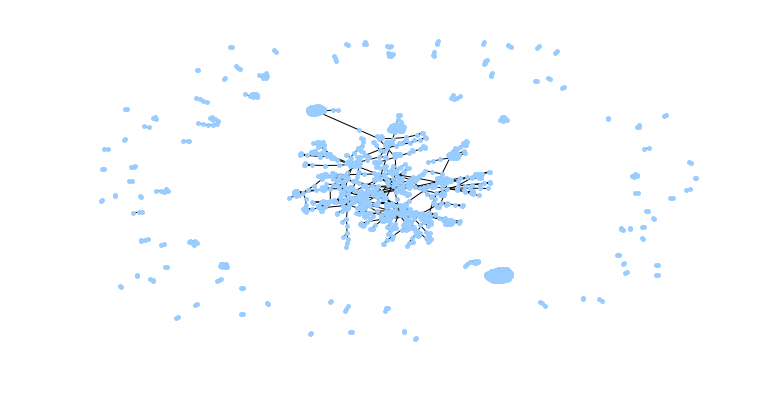

In [84]:
BLUE = "#99CCFF"
nx.draw(T, with_labels=False,node_color=BLUE, node_size = 15)

**5. Draw the degree distribution histogram.**

In [18]:
degree=G.degree()
degree_list=[x[1] for x in degree]
len(degree_list)

1387

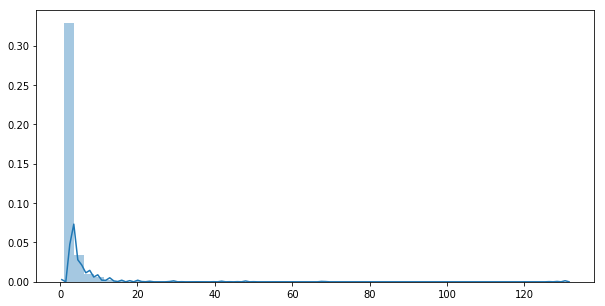

In [24]:
sns.distplot(degree_list);

*Comments*: The majority of nodes in network has few connections; however, there are still some with a large number of edges.

**6. Find the largest connected component of the network  (LC) and answer the following questions about LC (or implement the tasks)**

In [27]:
largest_cc=max(nx.connected_components(G), key=len)
len(largest_cc)

993

**6.1. Draw LCC**

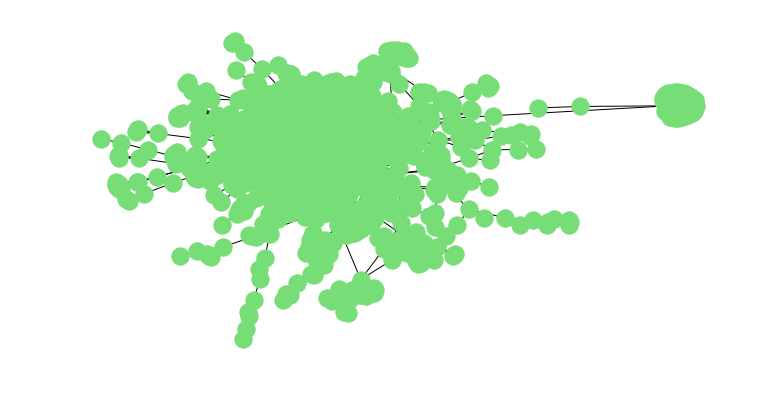

In [85]:
Gc = max(nx.connected_component_subgraphs(G), key=len)
GREEN = "#77DD77"
nx.draw(Gc,node_color=GREEN)

**6.2. What is its diameter?**
<br>
The diameter is the maximum eccentricity.<br>
The eccentricity of a node v is the maximum distance from v to all other nodes in the graph


In [29]:
nx.diameter(Gc)

22

**6.3. What is the center of LC?**<br>
The center is the set of nodes with eccentricity equal to radius

In [31]:
center_node=nx.center(Gc)
print(center_node)

['C37A5.9', 'C54D1.6']


In [82]:
nx.eccentricity(Gc, v='C37A5.9')

11

In [83]:
nx.eccentricity(Gc, v='C54D1.6')

11

**6.4. What is the number of clique communities with 3 nodes?**
<br>
A k-clique community is the union of all cliques of size k that can be reached through adjacent (sharing k-1 nodes) k-cliques

In [70]:
c=list(community.k_clique_communities(Gc, 3))
len(c)

44

**6.5. What is the name of the protein that changing its status has potentially the biggest effect on the rest of the network?**<br>
Betweenness centrality measures how often a node serves as a bridge from one part of a graph to another. Therefore, changing status of a node with highest betweenness centrality can have a great influence on the flow of information in a graph.

In [77]:
betweenness_centrality=nx.betweenness_centrality(G)
top5_betweenness=sorted(betweenness_centrality.items(), key=lambda x: x[1], reverse=True)[:5]
top5_betweenness

[('C23G10.4', 0.08356781880879106),
 ('F15B10.2', 0.06783565411724257),
 ('C15H9.6', 0.06635410317720787),
 ('W01A11.3', 0.06298891556621682),
 ('M79.1', 0.06190908587462727)]

Hence, the name of that protein is **C23G10.4**